In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bonavista
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | barbar
City not found. Skipping...
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | taoudenni
Processing Record 10 of Set 1 | gaoual
Processing Record 11 of Set 1 | bowen
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | tocache
Processing Record 15 of Set 1 | kambove
Processing Record 16 of Set 1 | kijang
Processing Record 17 of Set 1 | ballina
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record

Processing Record 39 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | loksa
Processing Record 43 of Set 4 | taltal
Processing Record 44 of Set 4 | kivsharivka
Processing Record 45 of Set 4 | lakes entrance
Processing Record 46 of Set 4 | meulaboh
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | iqaluit
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | abu samrah
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | praia da vitoria
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | deputatskiy
Processing Record 7 of Set 5 | clarksburg
Processing Record 8 of Set 5 | yabelo
Processing Record 9 of Set 5 | miles city
Processing Record 10 of Set 5 | bethel
Processing Record 11 of Set 5 | olga
Processing Record 12

Processing Record 31 of Set 8 | alotau
City not found. Skipping...
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | acapulco
Processing Record 34 of Set 8 | khonuu
City not found. Skipping...
Processing Record 35 of Set 8 | sao gabriel da cachoeira
Processing Record 36 of Set 8 | esperance
Processing Record 37 of Set 8 | shahr-e babak
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | acri
Processing Record 41 of Set 8 | sept-iles
Processing Record 42 of Set 8 | deolali
Processing Record 43 of Set 8 | manadhoo
Processing Record 44 of Set 8 | tacoronte
Processing Record 45 of Set 8 | egvekinot
Processing Record 46 of Set 8 | ambatondrazaka
Processing Record 47 of Set 8 | ivanovka
Processing Record 48 of Set 8 | bandarbeyla
Processing Record 49 of Set 8 | necochea
Processing Record 50 of Set 8 | srandakan
Processing Record 1 of Set 9 | krasnoye
Processing Record 2 of Set 9 | hamilton
Processing Recor

Processing Record 21 of Set 12 | bardiyah
Processing Record 22 of Set 12 | flinders
Processing Record 23 of Set 12 | hay river
Processing Record 24 of Set 12 | constantine
Processing Record 25 of Set 12 | dezful
Processing Record 26 of Set 12 | bogotol
Processing Record 27 of Set 12 | balti
Processing Record 28 of Set 12 | komsomolskiy
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | coronel fabriciano
Processing Record 31 of Set 12 | linxia
Processing Record 32 of Set 12 | sumbe
Processing Record 33 of Set 12 | abha
Processing Record 34 of Set 12 | kichera
Processing Record 35 of Set 12 | chivay
Processing Record 36 of Set 12 | cockburn town
Processing Record 37 of Set 12 | chowchilla
Processing Record 38 of Set 12 | yelyzavethradka
Processing Record 39 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 40 of Set 12 | mangan
Processing Record 41 of Set 12 | pandan
Processing Record 42 of Set 12 | hecun
Processing Record 43 of Set 12 |

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.6499,-53.1147,31.10,73,99,10.36,CA,2022-04-15 11:02:10
1,Ushuaia,-54.8000,-68.3000,40.66,81,40,0.00,AR,2022-04-15 10:57:41
2,Sitka,57.0531,-135.3300,33.30,71,2,1.28,US,2022-04-15 11:02:11
3,Klaksvik,62.2266,-6.5890,49.12,99,100,13.76,FO,2022-04-15 11:02:11
4,Atuona,-9.8000,-139.0333,78.39,80,24,14.07,PF,2022-04-15 11:02:11
5,Cape Town,-33.9258,18.4232,71.11,50,18,14.00,ZA,2022-04-15 11:02:12
6,Laguna,38.4210,-121.4238,54.75,90,100,8.05,US,2022-04-15 11:02:12
7,Taoudenni,22.6783,-3.9836,88.50,10,0,14.23,ML,2022-04-15 11:02:13
8,Gaoual,11.7500,-13.2000,96.04,24,31,3.31,GN,2022-04-15 11:02:13
9,Bowen,-20.0167,148.2333,76.15,62,13,19.60,AU,2022-04-15 11:02:13


In [20]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp",
                    "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2022-04-15 11:02:10,48.6499,-53.1147,31.10,73,99,10.36
1,Ushuaia,AR,2022-04-15 10:57:41,-54.8000,-68.3000,40.66,81,40,0.00
2,Sitka,US,2022-04-15 11:02:11,57.0531,-135.3300,33.30,71,2,1.28
3,Klaksvik,FO,2022-04-15 11:02:11,62.2266,-6.5890,49.12,99,100,13.76
4,Atuona,PF,2022-04-15 11:02:11,-9.8000,-139.0333,78.39,80,24,14.07
5,Cape Town,ZA,2022-04-15 11:02:12,-33.9258,18.4232,71.11,50,18,14.00
6,Laguna,US,2022-04-15 11:02:12,38.4210,-121.4238,54.75,90,100,8.05
7,Taoudenni,ML,2022-04-15 11:02:13,22.6783,-3.9836,88.50,10,0,14.23
8,Gaoual,GN,2022-04-15 11:02:13,11.7500,-13.2000,96.04,24,31,3.31
9,Bowen,AU,2022-04-15 11:02:13,-20.0167,148.2333,76.15,62,13,19.60


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

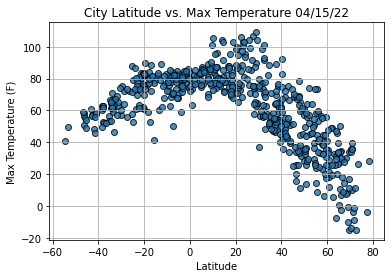

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

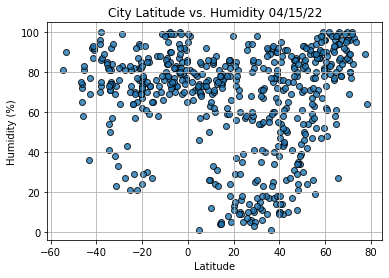

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

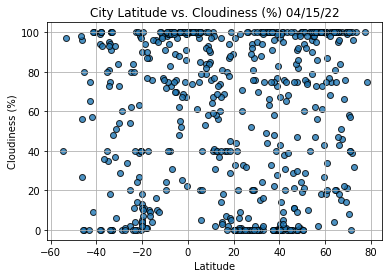

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

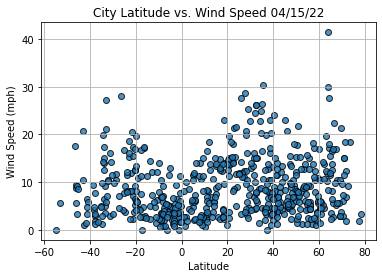

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

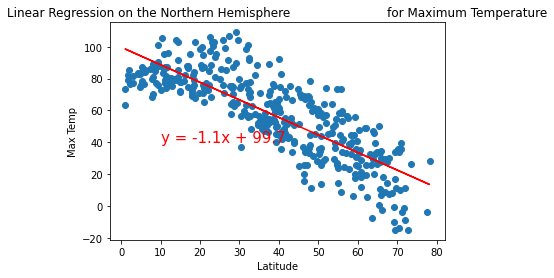

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

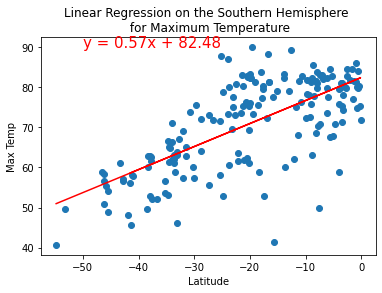

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

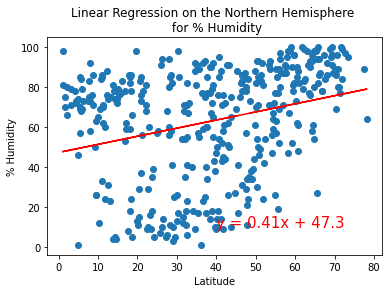

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,10))

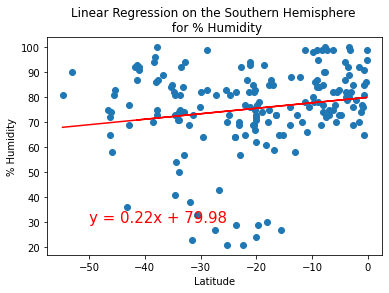

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,30))

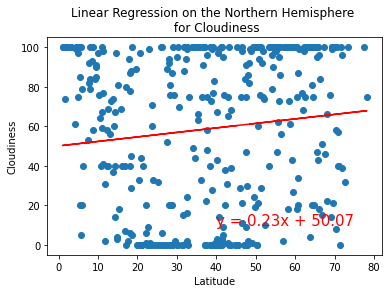

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for %Cloudiness',
                       '%Cloudiness',(40,10))

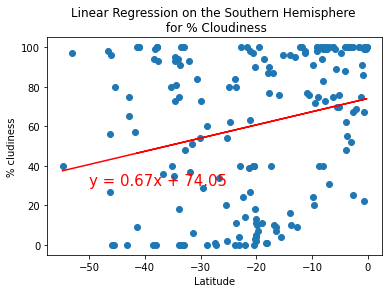

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% cludiness',(-50,30))

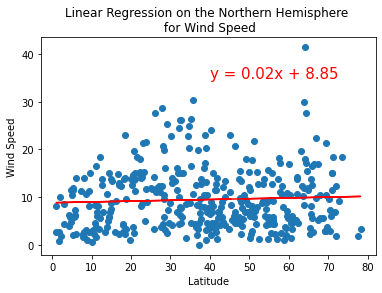

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(40,35))

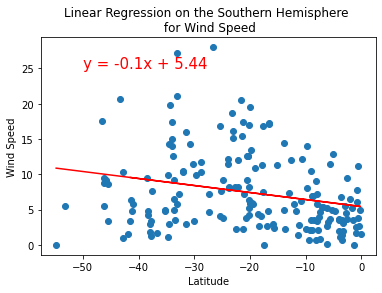

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,25))